# Check subquota limit

Test if in some case the subquota who have monthly limit bit the max value.


In [1]:
using DataFrames, Gadfly

limit = readtable("../data/2016-11-15-limit-by-subquota.csv")

,month,year,name,subquota_description,value,max
1,11,2013,HENRIQUE OLIVEIRA,Automotive vehicle renting or charter,13600.0,10000.0
2,12,2013,HENRIQUE OLIVEIRA,Automotive vehicle renting or charter,19200.0,10000.0
3,11,2014,EDIO LOPES,Automotive vehicle renting or charter,16450.0,10000.0
4,4,2015,HÉLIO LEITE,Fuels and lubricants,7526.0599999999995,4900.0
5,7,2015,LUIZ CARLOS BUSATO,Fuels and lubricants,10977.76,4900.0
6,7,2015,WASHINGTON REIS,Fuels and lubricants,9332.519999999999,4900.0
7,9,2015,ADAIL CARNEIRO,Fuels and lubricants,5890.0,4900.0
8,9,2015,ADALBERTO CAVALCANTI,Fuels and lubricants,5890.0,4900.0
9,9,2015,ADELMO CARNEIRO LEÃO,Fuels and lubricants,5890.0,4900.0
10,9,2015,AELTON FREITAS,Fuels and lubricants,5222.119999999999,4900.0


Create a new column with difference value

In [2]:
limit[:diff] = map((x,y) -> x-y , limit[:value], limit[:max])


746-element Array{Float64,1}:
 3600.0 
 9200.0 
 6450.0 
 2626.06
 6077.76
 4432.52
  990.0 
  990.0 
  990.0 
  322.12
    7.02
   30.36
  990.0 
    ⋮   
  393.37
 1059.62
 1100.0 
  900.0 
 1100.0 
  391.11
 1056.17
  601.56
 1100.0 
  102.46
  811.11
  880.0 

The total bitted for each subquota group. 

In [3]:
by(limit, [:subquota_description], limit -> sum(limit[:diff]))

,subquota_description,x1
1,Automotive vehicle renting or charter,23450.0
2,Fuels and lubricants,598482.8399999999


Follow the first figure show the distribution between the number of times and the difference when the net_value bit the max. And the second figure show the desity to the value spent, the density is the percentage to each subquota group. The third shows the value limit passed month by month. 

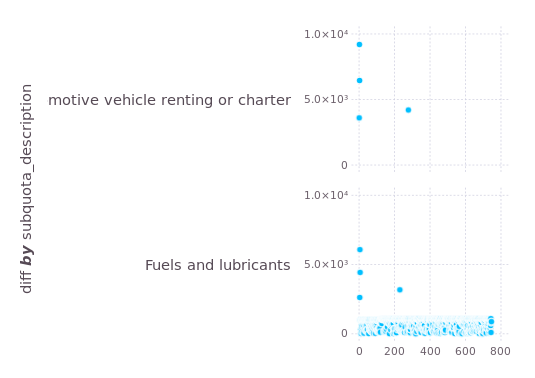

In [4]:
plot(limit,ygroup="subquota_description" ,y="diff", Geom.subplot_grid(Geom.point))

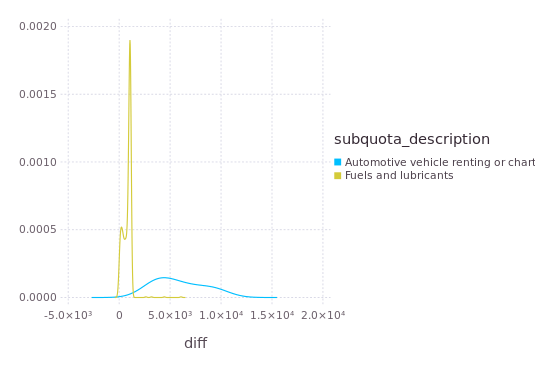

In [5]:
plot(limit, x="diff", color="subquota_description", Geom.density)


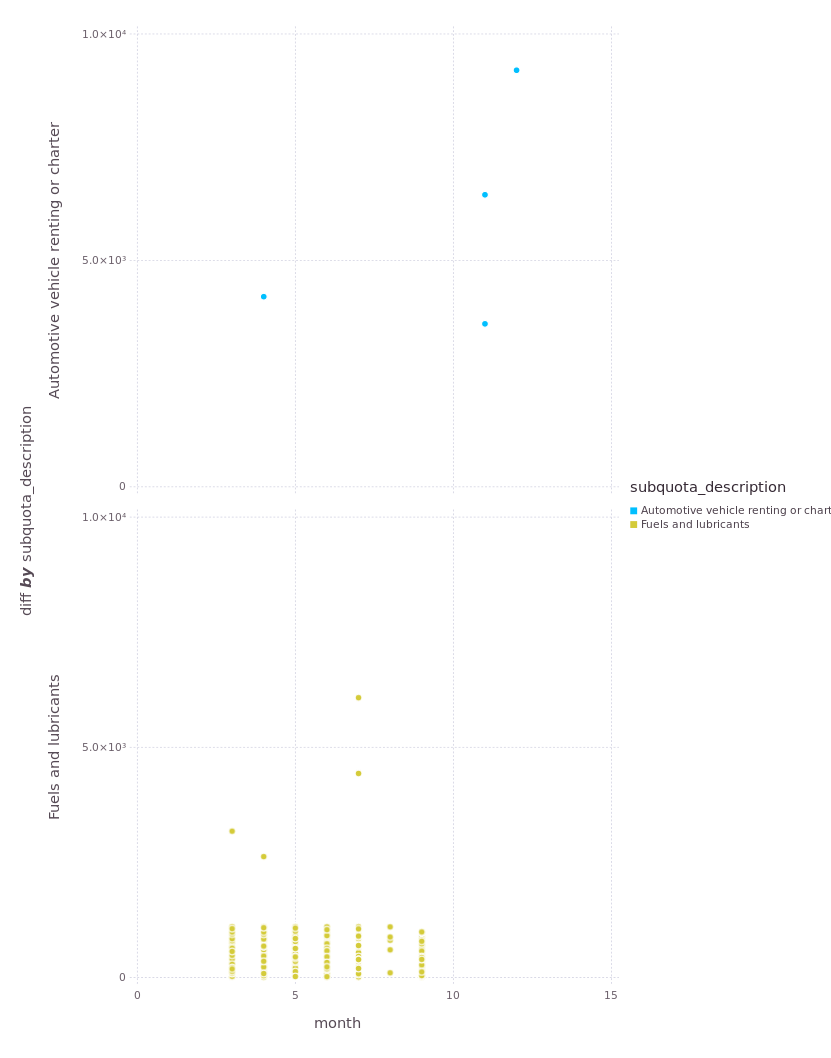

In [6]:
set_default_plot_size(22cm, 28cm)
plot(limit, ygroup="subquota_description", x="month",  y="diff", color="subquota_description", Geom.subplot_grid(Geom.point))